In [1]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Data source is '2015_CBQ_I.csv' from NHANES 'GrocerySpending' folder
# Columns originally named with question code (Example: CDB071)
# Columns renamed with descriptive question ID (Example: Grocery)
df = pd.read_csv('GroceryData_RuralUrban.csv', encoding='latin-1')

In [3]:
df.columns

Index(['GeoID', 'County', 'State', 'Rural', 'G_Etab_2005', 'G_Etab_2006',
       'G_Etab_2007', 'G_Etab_2008', 'G_Etab_2009', 'G_Etab_2010',
       'G_Etab_2011', 'G_Etab_2012', 'G_Etab_2013', 'G_Etab_2014',
       'G_Etab_2015', 'G_Etab_2016'],
      dtype='object')

In [4]:
df.head()

,GeoID,County,State,Rural,G_Etab_2005,G_Etab_2006,G_Etab_2007,G_Etab_2008,G_Etab_2009,G_Etab_2010,G_Etab_2011,G_Etab_2012,G_Etab_2013,G_Etab_2014,G_Etab_2015,G_Etab_2016
0,1001,Autauga County,Alabama,Urban,6,4,4,6,6,6,5,4,5,4,5,3
1,1003,Baldwin County,Alabama,Urban,29,27,23,25,24,25,27,26,30,29,30,29
2,1005,Barbour County,Alabama,Suburban,7,8,6,7,5,6,6,5,5,5,4,4
3,1007,Bibb County,Alabama,Suburban,9,8,7,7,6,6,6,5,5,5,5,5
4,1009,Blount County,Alabama,Suburban,10,9,6,8,6,6,7,8,7,6,5,5


In [5]:
# Drop empty values and convert data to integer
df = df.dropna(how='any')
df = df.drop(columns=['GeoID', 'County', 'State', 'Rural'])
df.head()

,G_Etab_2005,G_Etab_2006,G_Etab_2007,G_Etab_2008,G_Etab_2009,G_Etab_2010,G_Etab_2011,G_Etab_2012,G_Etab_2013,G_Etab_2014,G_Etab_2015,G_Etab_2016
0,6,4,4,6,6,6,5,4,5,4,5,3
1,29,27,23,25,24,25,27,26,30,29,30,29
2,7,8,6,7,5,6,6,5,5,5,4,4
3,9,8,7,7,6,6,6,5,5,5,5,5
4,10,9,6,8,6,6,7,8,7,6,5,5


In [6]:
# df.describe()

In [7]:
# Show summary of correlations
# df.corr()

### TEST MODEL: Set last two years as test data; everything else as train data.

Skip if using split data function.
(Reference 21.3 Stu_Respiratory_Disease)

In [8]:
# df.columns

In [9]:
# train_df = df.iloc[:, :-2] # select all but last two columns for training
# test_df = df.iloc[:, -2:] # select last two columns for testing

In [10]:
# len(train_df)

In [11]:
# X = train_df
# y = test_df
# print(X.shape, y.shape)

### Auto generate train and test data

In [42]:
# Assign X (data) and y (target)
X = df.iloc[:, :-1] # All but last
y = df.iloc[:,-1].values.reshape(-1, 1)
print(X.shape, y.shape)

(3005, 11) (3005, 1)


In [43]:
# # split model for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Machine Learning

In [44]:
# Used example of Example 21.1.2 Stu_LSD
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9994834610830692
Testing Score: 0.9992245343737803


In [46]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[ 0.01525223  0.0568189  -0.01099772 -0.14511847  0.02610072 -0.0372031
  -0.03477336 -0.09004797  0.34430643  0.17125838  0.68155686]]
y-axis intercept:  [0.07757165]


In [47]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[[1 1 1 1 1 1 1 1 1 1 1]]]
Max X Value: [[[2166 2141 2084 2058 2027 2024 2117 2339 2405 2429 2518]]]


Text(0.5, 1.0, 'Residual Plot')

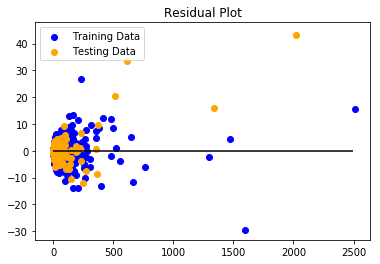

In [48]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [49]:
predictions=model.predict(X_test)

In [50]:
predictions[:10] # predictions

array([[ 3.9684869 ],
       [ 4.34037542],
       [ 5.08827977],
       [ 3.61214762],
       [ 2.03187746],
       [34.90893342],
       [ 1.89140137],
       [ 4.16514899],
       [ 5.04654268],
       [ 1.1310502 ]])

In [51]:
y_test[:10] # compare with actual results

array([[ 4],
       [ 2],
       [ 4],
       [ 3],
       [ 2],
       [31],
       [ 2],
       [ 5],
       [ 5],
       [ 1]])

In [41]:
X_new=[3,4]



In [37]:
ynew = model.predict(X_new)

ValueError: Expected 2D array, got 1D array instead:
array=[3 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.